# Machine Learning Project
### Spring 2023
### Group Members: Hanna Choi & Anna-Lisa Vu

## Bank Churners Analysis
### Problem Statement

We decided to do a ML project which predicts whether a customer will leave their bank credit card service.  Some (but not all) the variables used for prediction is:
* Age
* Salary
* Marital_Status
* Credit Card Limit
* Credit Card Category

Additional details on the problem statement (as copied from Kaggle):
"A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction."  This dataset was gathered from Kaggle and can be access through this link: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
RANDOM_STATE = 516

### Import the data and Create Dataframes

In [3]:
#df = pd.read_csv('/Users/lisasaurus01/git/dsc540_ml_project/BankChurners.csv')
df = pd.read_csv('BankChurners.csv')
attrited_customers = df[df['Attrition_Flag'] == 'Attrited Customer']
existing_customers = df[df['Attrition_Flag'] == 'Existing Customer']

#drop un-needed columns
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis=1, inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis=1, inplace=True)

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


## Data Exploration


In [4]:
print("The data set consists of "+str(df.shape[0])+" rows and "+str(df.shape[1])+" columns (features).")

The data set consists of 10127 rows and 21 columns (features).


In [5]:
print("The data types of all columns is below.")
df.dtypes

The data types of all columns is below.


CLIENTNUM                     int64
Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

There are only 6 categorical variables (including the target variable) which include -
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category
* Attrition_Flag

The rest is all continuous (either int or floats).


In [6]:
print("The general stats of all continuous features is below.")
df.describe()

The general stats of all continuous features is below.


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
print("The breakdown of gender in the data set is below:")
df['Gender'].value_counts()

The breakdown of gender in the data set is below:


Gender
F    5358
M    4769
Name: count, dtype: int64

There are more females than males.

In [8]:
print("The breakdown of education in the data set is below:")
df['Education_Level'].value_counts()

The breakdown of education in the data set is below:


Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Graduate level seems the highest level achieved.  We are assuming that "graduate" means education after college.  There is a noticeable amount of Unknown and Uneducated people in the data set as well.

In [9]:
print("The breakdown of marital status in the data set is below:")
df['Marital_Status'].value_counts()

The breakdown of marital status in the data set is below:


Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

In [10]:
print("The breakdown of income category in the data set is below:")
df['Income_Category'].value_counts()

The breakdown of income category in the data set is below:


Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

In [11]:
print("The breakdown of card category in the data set is below:")
df['Card_Category'].value_counts()

The breakdown of card category in the data set is below:


Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64

### Target Variable - Attrition Flag
The target variable is "Attrition Flag".  A "churned" customer is considered as someone who is an "Attritted Customer".  Otherwise, the customer would be an "existing customer".

In [12]:
df['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

In [13]:
num_attrited_customers = len(attrited_customers)
num_existing_customers = len(existing_customers)
print("The percentage of attrited customers is: "+str((num_attrited_customers / len(df)) * 100) + " percent.")

The percentage of attrited customers is: 16.065962279055988 percent.


We are dealing with an imbalanced dataset since there are only 16% of attrited customers in the set.

<AxesSubplot:title={'center':'Attrition_Flag'}, ylabel='count'>

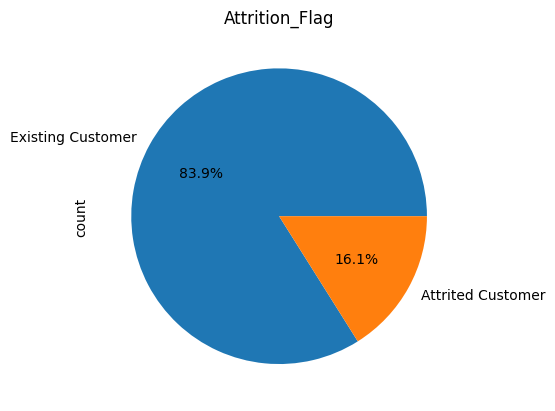

In [15]:
import plotly.express as ex
#ex.pie(df,names='Attrition_Flag', hole=0)
df['Attrition_Flag'].value_counts().plot(kind='pie', title='Attrition_Flag', autopct='%1.1f%%')

In [16]:
print("The general stats of all attrited customer data is below.")
attrited_customers.describe()

The general stats of all attrited customer data is below.


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.627000e+03,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,7.352614e+08,46.659496,2.402581,36.178242,3.279656,2.693301,2.972342,8136.039459,672.822987,7463.216472,0.694277,3095.025814,44.933620,0.554386,0.162475,0.994909,0.005091
std,3.557725e+07,7.665652,1.275010,7.796548,1.577782,0.899623,1.090537,9095.334105,921.385582,9109.208129,0.214924,2308.227629,14.568429,0.226854,0.264458,0.004303,0.004303
min,7.080833e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.945910,0.000420
25%,7.123713e+08,41.000000,2.000000,32.000000,2.000000,2.000000,2.000000,2114.000000,0.000000,1587.000000,0.544500,1903.500000,37.000000,0.400000,0.000000,0.994300,0.002825
50%,7.165644e+08,47.000000,2.000000,36.000000,3.000000,3.000000,3.000000,4178.000000,0.000000,3488.000000,0.701000,2329.000000,43.000000,0.531000,0.000000,0.996310,0.003688
75%,7.683737e+08,52.000000,3.000000,40.000000,5.000000,3.000000,4.000000,9933.500000,1303.500000,9257.500000,0.856000,2772.000000,51.000000,0.692000,0.231000,0.997170,0.005700
max,8.282949e+08,68.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,1.492000,10583.000000,94.000000,2.500000,0.999000,0.999580,0.054090


In [17]:
print("The breakdown of gender for all attrited customers is below:")
attrited_customers['Gender'].value_counts()

The breakdown of gender for all attrited customers is below:


Gender
F    930
M    697
Name: count, dtype: int64

In [18]:
print("The breakdown of education level for all attrited customers is below:")
attrited_customers['Education_Level'].value_counts()

The breakdown of education level for all attrited customers is below:


Education_Level
Graduate         487
High School      306
Unknown          256
Uneducated       237
College          154
Doctorate         95
Post-Graduate     92
Name: count, dtype: int64

In [19]:
print("The breakdown of marital status for all attrited customers is below:")
attrited_customers['Marital_Status'].value_counts()

The breakdown of marital status for all attrited customers is below:


Marital_Status
Married     709
Single      668
Unknown     129
Divorced    121
Name: count, dtype: int64

In [20]:
print("The breakdown of income category in the data set is below:")
attrited_customers['Income_Category'].value_counts()

The breakdown of income category in the data set is below:


Income_Category
Less than $40K    612
$40K - $60K       271
$80K - $120K      242
$60K - $80K       189
Unknown           187
$120K +           126
Name: count, dtype: int64

In [21]:
print("The breakdown of card category in the data set is below:")
attrited_customers['Card_Category'].value_counts()

The breakdown of card category in the data set is below:


Card_Category
Blue        1519
Silver        82
Gold          21
Platinum       5
Name: count, dtype: int64

### Null Values

In [22]:
df.isna().sum()

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

There appears to be no null values.

## Data Visualizations

### Breakdown of Categorical Attributes between Attrited and Existing Customers

#### Gender

Since there are more females and males in the data set, the breakdown in gender between the 2 types of categories was not surprising.

<AxesSubplot:title={'center':'Gender by Attrition Flag'}, xlabel='Attrition_Flag,Gender'>

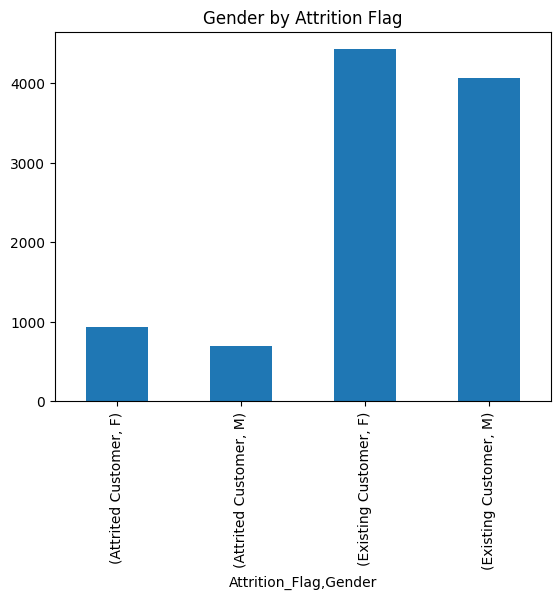

In [23]:
df_attrition_gender = df.groupby('Attrition_Flag')['Gender'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Gender by Attrition Flag')

Since there are more females than males in the data set, the results above are no surprise.

#### Education Level

Between existing and attrited customers, the ratio of customers in each education category appears the same.

<AxesSubplot:title={'center':'Education_Level - Attrited Customers'}, ylabel='count'>

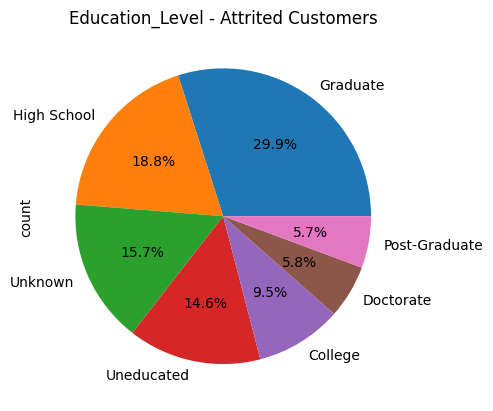

In [24]:
attrited_customers['Education_Level'].value_counts().plot(kind='pie', title='Education_Level - Attrited Customers', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Education_Level - Existing Customers'}, ylabel='count'>

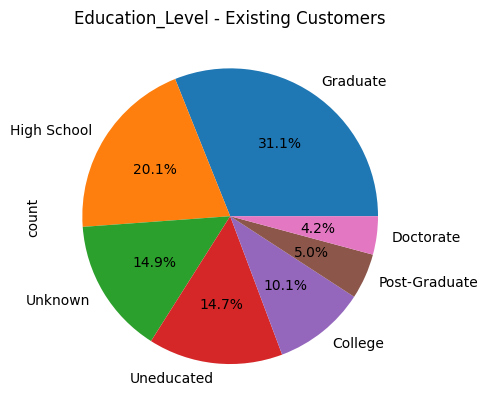

In [25]:
existing_customers['Education_Level'].value_counts().plot(kind='pie', title='Education_Level - Existing Customers', autopct='%1.1f%%')

#### Marital Status

Between existing and attrited customers, the ratio of customers in each marital status category appears the same.

<AxesSubplot:title={'center':'Marital Status - Attrited Customers'}, ylabel='count'>

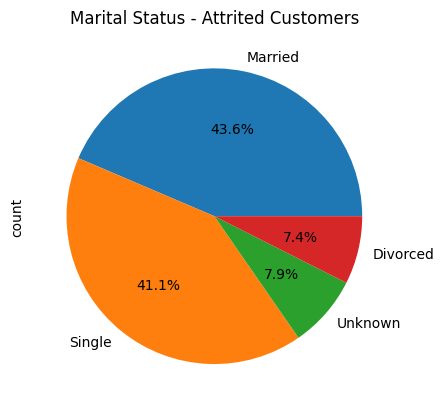

In [26]:
attrited_customers['Marital_Status'].value_counts().plot(kind='pie', title='Marital Status - Attrited Customers', autopct='%1.1f%%')

<AxesSubplot:title={'center':'Marital Status - Existing Customers'}, ylabel='count'>

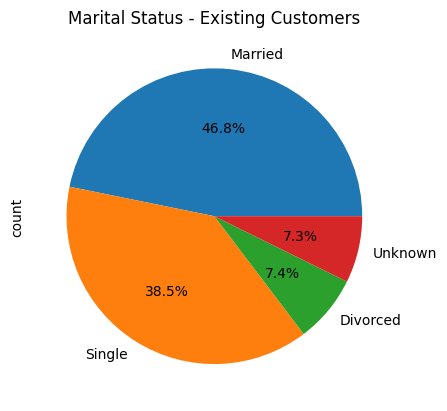

In [27]:
existing_customers['Marital_Status'].value_counts().plot(kind='pie', title='Marital Status - Existing Customers', autopct='%1.1f%%')

#### Income Category

Between existing and attrited customers, the ratio of customers between the 2 types of customers in each income bracket appears the same.

<AxesSubplot:title={'center':'Income Category by Attrition Flag'}, xlabel='Attrition_Flag,Income_Category'>

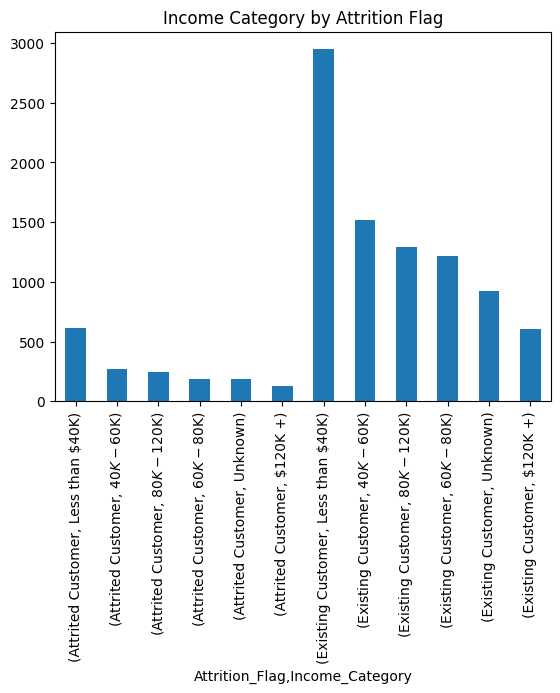

In [28]:
df_attrition_gender = df.groupby('Attrition_Flag')['Income_Category'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Income Category by Attrition Flag')

#### Card Category

Most customers are in the Blue category.  In second place is the Silver category.  There seems to be only existing customers who are using the Gold category.

<AxesSubplot:title={'center':'Card Category by Attrition Flag'}, xlabel='Attrition_Flag,Card_Category'>

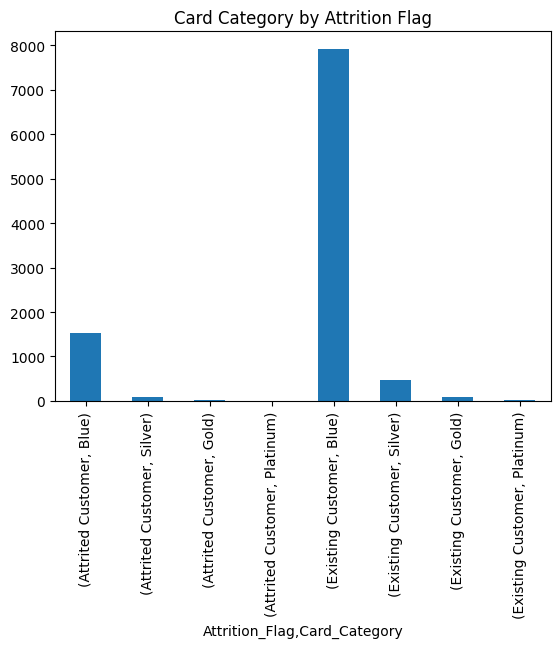

In [29]:
df_attrition_gender = df.groupby('Attrition_Flag')['Card_Category'].value_counts()

df_attrition_gender.plot.bar(x='Attrition_Flag', stacked=True, title='Card Category by Attrition Flag')

### Breakdown of Select Continuous Attributes between Attrited and Existing Customers


#### Months on the Book - Existing vs. Attritted Customers

The breakdown of months on book between existing and attritted customers appears the same between the 2 groups.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

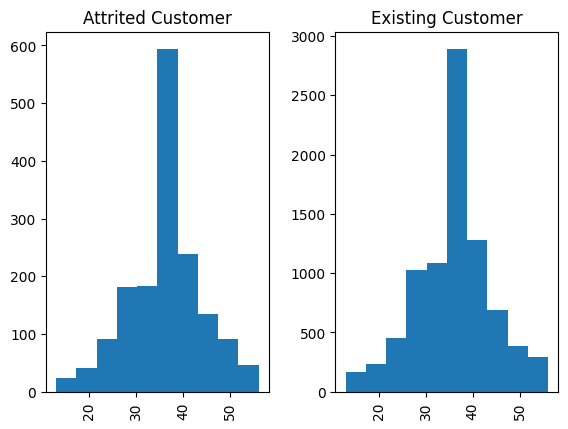

In [30]:
df['Months_on_book'].hist(by=df['Attrition_Flag'])

#### Age - Existing vs. Attritted Customers

The age breakdown between existing and attritted customers appears to be almost the same.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

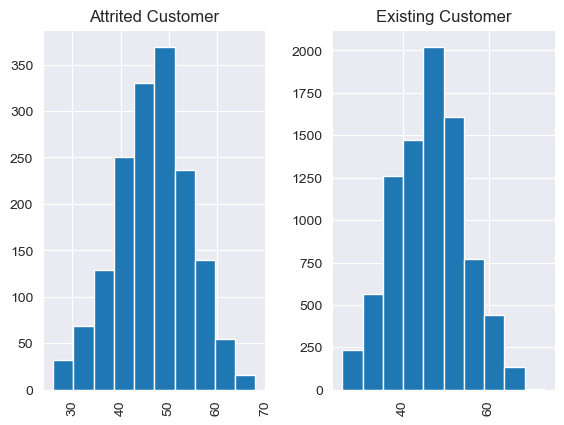

In [31]:
df['Customer_Age'].hist(by=df['Attrition_Flag'])

In [32]:
print("The mean of existing customers is: " + str(existing_customers['Customer_Age'].mean()))
print("The mean of attritted customers is: " + str(attrited_customers['Customer_Age'].mean()))

The mean of existing customers is: 46.26211764705882
The mean of attritted customers is: 46.659496004917024


#### Credit Limit - Existing vs. Attrited Customers

The credit limit breakdown between existing and attrited customers appears to be the same.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

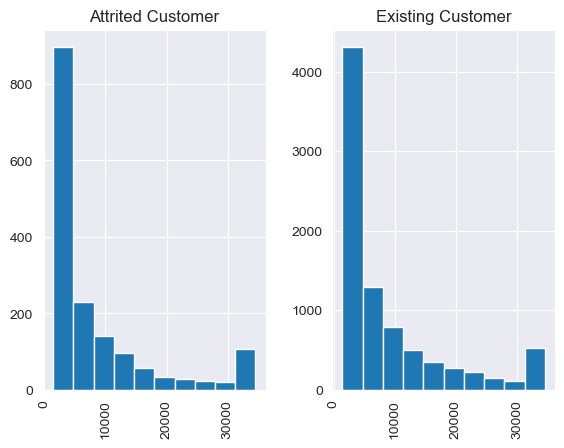

In [33]:
df['Credit_Limit'].hist(by=df['Attrition_Flag'])

#### Total Revolving Balance - Existing vs. Attrited Customers

From the graphs below, it appears that attrited customers tend to hold a much lower revolving balace than existing customers; indicating that this attribute may be important in determining whether a customer will churn.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

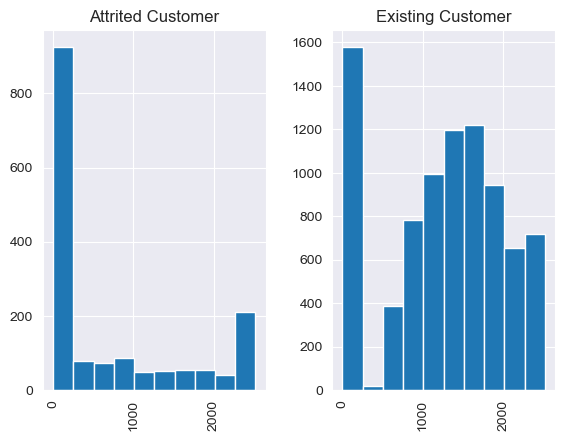

In [34]:
df['Total_Revolving_Bal'].hist(by=df['Attrition_Flag'])

#### Avg. Open to Buy - Existing vs. Attrited Customers


The avg. open to buy breakdown between existing and attrited customers appears to be the same.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

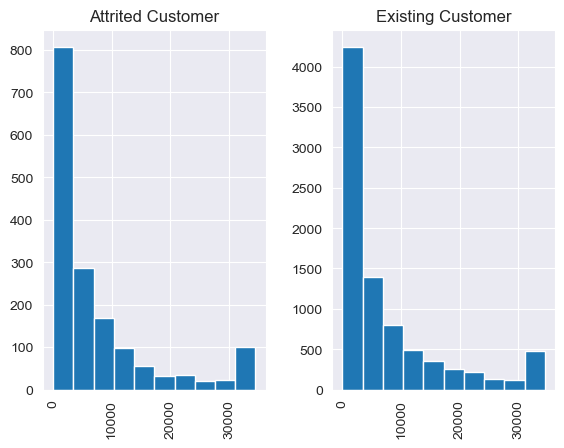

In [35]:
df['Avg_Open_To_Buy'].hist(by=df['Attrition_Flag'])

#### Total Amt. Change Q4_Q1 - Existing vs. Attrited Customers


From the graphs below, it appears that attrited customers tend to hold a much lower total amt change Q4_Q1 value than existing customers; indicating that this attribute may be important in determining whether a customer will churn.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

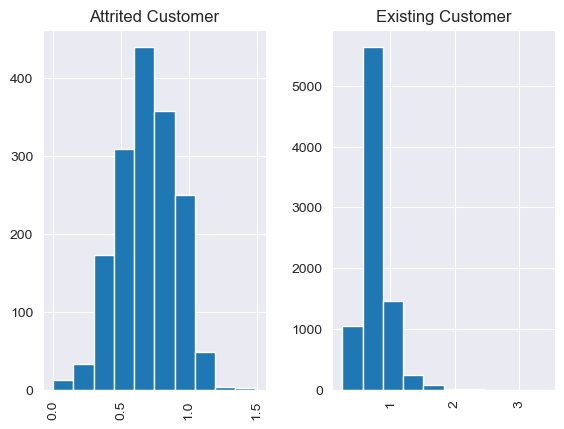

In [36]:
df['Total_Amt_Chng_Q4_Q1'].hist(by=df['Attrition_Flag'])

#### Total Ct. Change Q4_Q1 - Existing vs. Attrited Customers


From the graphs below, it appears that attrited customers have a slightly lower value for this attribute than existing customers.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

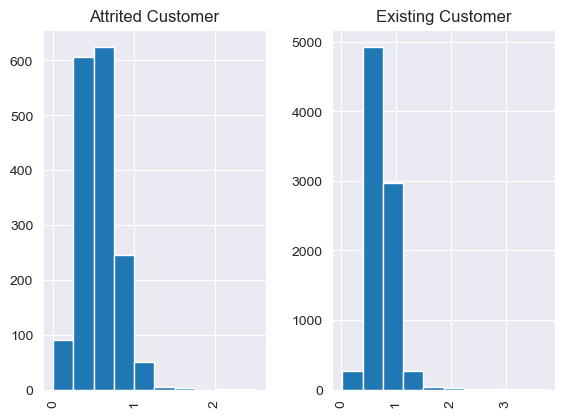

In [37]:
df['Total_Ct_Chng_Q4_Q1'].hist(by=df['Attrition_Flag'])

In [38]:
print(existing_customers['Total_Ct_Chng_Q4_Q1'].describe())
print(attrited_customers['Total_Ct_Chng_Q4_Q1'].describe())

count    8500.000000
mean        0.742434
std         0.228054
min         0.028000
25%         0.617000
50%         0.721000
75%         0.833000
max         3.714000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64
count    1627.000000
mean        0.554386
std         0.226854
min         0.000000
25%         0.400000
50%         0.531000
75%         0.692000
max         2.500000
Name: Total_Ct_Chng_Q4_Q1, dtype: float64


#### Total Trans Amt. - Existing vs. Attrited Customers

Attrited customers have a lower value for total trans amt. compared to existing customers.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

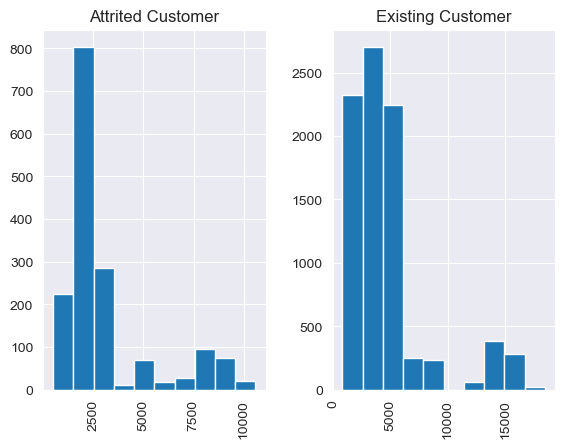

In [39]:
df['Total_Trans_Amt'].hist(by=df['Attrition_Flag'])

#### Total Trans Ct. - Existing vs. Attrited Customers

Attrited customers have a lower value for total trans ct. compared to existing customers.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

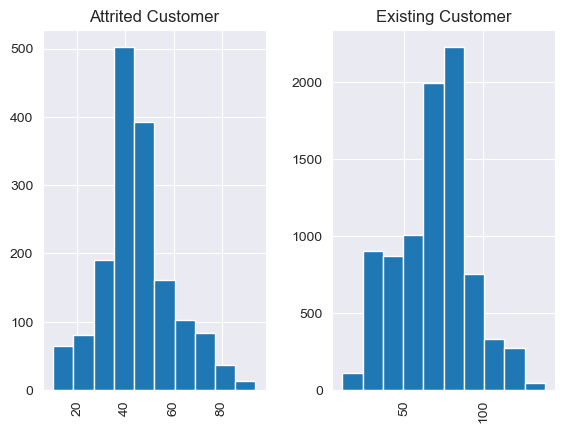

In [40]:
df['Total_Trans_Ct'].hist(by=df['Attrition_Flag'])

#### Avg. Utilization Ratio

Attrited customers tend to have a lower avg. utilization ratio than existing customers.

array([<AxesSubplot:title={'center':'Attrited Customer'}>,
       <AxesSubplot:title={'center':'Existing Customer'}>], dtype=object)

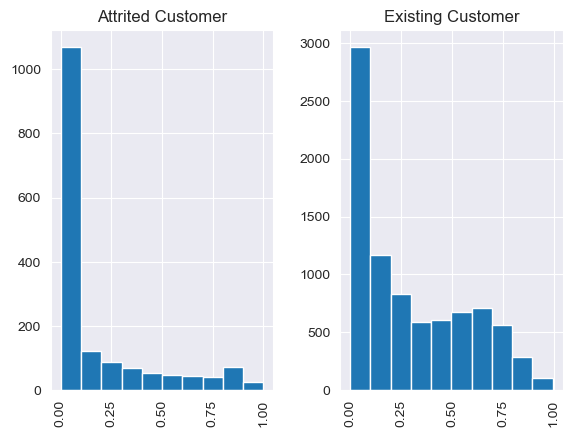

In [41]:
df['Avg_Utilization_Ratio'].hist(by=df['Attrition_Flag'])

### Heat Map & Correlations

Below is a heat map on the correlation between the attributes.

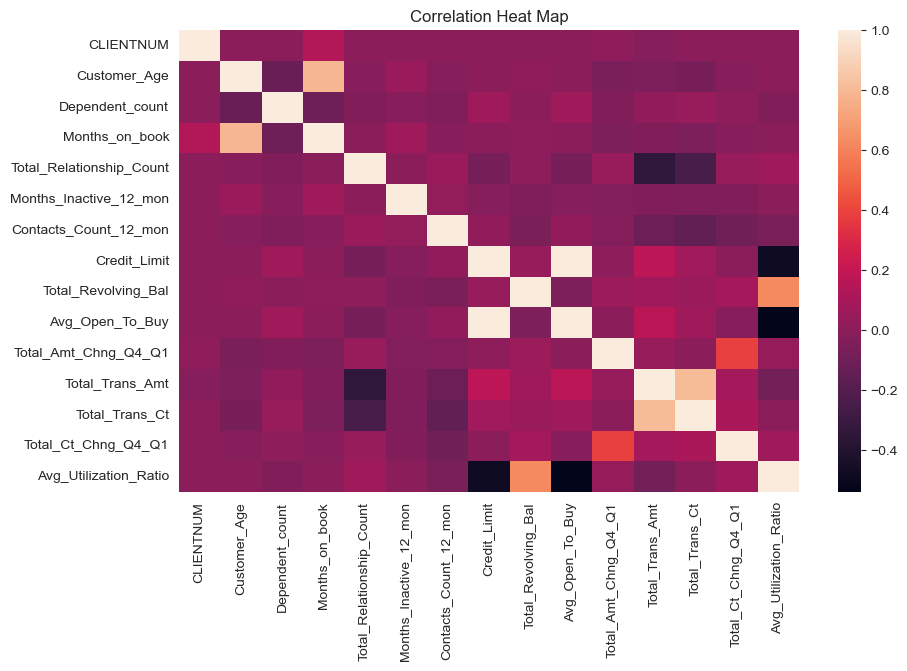

In [42]:
### Correlation Heat Map
#Correlation heat map
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr())
plt.title('Correlation Heat Map')
plt.show()

In [43]:
df.corr()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


Some higher correlations which are worth looking into:
* Total_Trans_Amt vs. Total_Trans_Ct - .807
* Credit_Limit vs. Avg_Open_To_Buy - .995
* Months_on_book vs. Customer_Age - .789

## Data Cleaning & Pre-Processing

First, we need to split the data between the dependent variables and dependent (target) variable.  The independent (predictor) variables will be stored in X and the target variable will be stored in y.

In [31]:
X = df.drop(['Attrition_Flag'], axis=1)
X.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [32]:
y = df.Attrition_Flag
y.head()

0    Existing Customer
1    Existing Customer
2    Existing Customer
3    Existing Customer
4    Existing Customer
Name: Attrition_Flag, dtype: object

Next, we drop CLIENTNUM since it's not going to be a helpful predictor.

In [33]:
X = X.drop(['CLIENTNUM'], axis=1)
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


Next we need to transform the categorical attributes into dummy variables for both the independent (X) and dependent (y) sets. According to below, the following variables are categorical:
* Gender
* Education_Level
* Marital_Status
* Income_Category
* Card_Category
* Attrition_Flag (Target Variable)

In [34]:
X = pd.get_dummies(X,['Gender', 'Education_Level', 'Maritial_Status', 'Income_Category', 'Card_Category'])

In [35]:
X.head()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,False,False,True,False,False,False,True,False,False,False
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,False,False,False,False,True,False,True,False,False,False
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,False,False,False,True,False,False,True,False,False,False
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,False,False,False,False,True,False,True,False,False,False
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,False,False,True,False,False,False,True,False,False,False


To transform the Y, we can use the LabelBinarizer since a customer is either an existing customer or an attrited customer.

In [36]:
lb = LabelBinarizer()
y = lb.fit_transform(y).ravel()
y = pd.Series(y)
y.value_counts()

1    8500
0    1627
Name: count, dtype: int64

Next, we should scale the dependent (X) data to follow the same scale.

In [37]:
# Scale the Data
ss = preprocessing.StandardScaler()
X_ss= ss.fit_transform(X)

## Preparing the Train, Test, & Validation Data
Because there are only 16% of attrited customers, it was important to make sure our train and test sets contain the same ratio of attrited customers in comparison to the original data set.  Therefore, we decided to use the stratified k.

In [38]:
# split the datasets into training and test data, make sure we use stratified method
# also make sure we use the scaled version of the X data
X_train, X_test, y_train, y_test = train_test_split(X_ss, y, stratify=y, test_size=0.40, random_state=RANDOM_STATE)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.50, random_state=RANDOM_STATE)

print("Length of training set:" +str(len(X_train)))
print("Length of testing set:" + str(len(X_test)))
print("Length of validation set:"+ str(len(X_val)))

Length of training set:6076
Length of testing set:2026
Length of validation set:2025


In [39]:
print("The percentage breakdown of existing and attrited customers for the train set is: \n"+str(y_train.value_counts(normalize=True)))
print("The percentage breakdown of existing and attrited customers for the test set is: \n"+str(y_test.value_counts(normalize=True)))
print("The percentage breakdown of existing and attrited customers for the valuation set is: \n"+str(y_val.value_counts(normalize=True)))

The percentage breakdown of existing and attrited customers for the train set is: 
1    0.839368
0    0.160632
Name: proportion, dtype: float64
The percentage breakdown of existing and attrited customers for the test set is: 
1    0.838105
0    0.161895
Name: proportion, dtype: float64
The percentage breakdown of existing and attrited customers for the valuation set is: 
1    0.840494
0    0.159506
Name: proportion, dtype: float64


## Utility Functions to Store Model Results
Below is a dataframe that will store all of the model results for comparison later on.

In [40]:
df_model_summary_cat = pd.DataFrame(
   {
      "Model": [],
      "Recall": [],
      "Specificity": [],
      "Precision": [],
      "Balanced Accuracy": [],
      "F1-Score": []
   }
)


# a function that stores a model name and scores for each model where the target variable is a category
def add_score_cat(model, recall, specificity, precision, balanced_accuracy, f1_score):
   df_model_summary_cat.loc[df_model_summary_cat.shape[0]] = [model, recall, specificity, precision, balanced_accuracy,
                                                              f1_score]

The percentage of attrited customers in the train, test, and validation data are roughly the same.

## Model Creation & Validation

For each model, we used grid search to find the best parameters to use for the training data set. Then, we used the best parameters to predict churned customers from the train and validation data.  We printed the metrics and added it to the model summary data frame for comparison later on.

### Logistic Regression Classifier

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
estimator = LogisticRegression(random_state=RANDOM_STATE)

param_grid = {
   'C': [0.0001, 0.001, 0.01, 0.03, 0.1, 0.3, 1, 2, 5, 10, 15, 20, 50, 100, 1000, 10000, 100000]
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_c = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("Best C: ", best_c)
print("Best Score: ", best_score)

Best C:  0.1
Best Score:  0.9438263177865938


In [43]:
# Use the best C for the model
clf = LogisticRegression(random_state=RANDOM_STATE, C=0.1)
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("LogisticRegression", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.78      0.56      0.65       976
           1       0.92      0.97      0.94      5100

    accuracy                           0.90      6076
   macro avg       0.85      0.77      0.80      6076
weighted avg       0.90      0.90      0.90      6076

[[ 546  430]
 [ 150 4950]]

Validation Set:

              precision    recall  f1-score   support

           0       0.79      0.59      0.67       323
           1       0.93      0.97      0.95      1702

    accuracy                           0.91      2025
   macro avg       0.86      0.78      0.81      2025
weighted avg       0.90      0.91      0.90      2025

[[ 189  134]
 [  49 1653]]
Accuracy: 0.910
Specificity: 0.585
Recall: 0.971
Precision: 0.925
F1-Score: 0.948


### K-Nearest Neighbors

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
estimator = KNeighborsClassifier(n_neighbors = 1)

param_grid = {
   'n_neighbors': [1, 3, 5, 7, 9],  # Adjust the range of neighbors if needed
   'weights': ['uniform', 'distance'],
   'p': [1, 2]  # For Minkowski distance (p=1: Manhattan distance, p=2: Euclidean distance)
}

# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator, param_grid, cv=5, scoring='f1')  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_c = grid_search.best_params_
best_score = grid_search.best_score_

print("Best C: ", best_c)
print("Best Score: ", best_score)

Best C:  {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score:  0.9302228432913686


In [46]:
clf = KNeighborsClassifier(n_neighbors=7, p=1, weights='uniform')
clf.fit(X_train, y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("KNeighborsClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.89      0.42      0.58       976
           1       0.90      0.99      0.94      5100

    accuracy                           0.90      6076
   macro avg       0.90      0.71      0.76      6076
weighted avg       0.90      0.90      0.88      6076

[[ 414  562]
 [  49 5051]]

Validation Set:

              precision    recall  f1-score   support

           0       0.83      0.37      0.51       323
           1       0.89      0.99      0.94      1702

    accuracy                           0.89      2025
   macro avg       0.86      0.68      0.73      2025
weighted avg       0.88      0.89      0.87      2025

[[ 120  203]
 [  24 1678]]
Accuracy: 0.888
Specificity: 0.372
Recall: 0.986
Precision: 0.892
F1-Score: 0.937


### Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
minlist = [1,2,3,4,5]
maxlist = [10,15,20,25,30]
elist = [10,20,30,40,50]

rn = RandomForestClassifier(random_state=RANDOM_STATE)
par = {'min_samples_split': minlist, 'max_depth': maxlist, 'n_estimators': elist, 'random_state': [42]}
grid = GridSearchCV(estimator = rn, param_grid = par, cv = 5, verbose = 1, n_jobs = -1, scoring = 'balanced_accuracy')
grid.fit(X_train, y_train)
grid.best_params_
grid.best_estimator_

Fitting 5 folds for each of 125 candidates, totalling 625 fits


C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


125 fits failed out of a total of 625.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
125 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\b

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [49]:
clf_rf = RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred = clf_rf.predict(X_train)
y_val_pred = clf_rf.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("RandomForestClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       1.00      1.00      1.00      5100

    accuracy                           1.00      6076
   macro avg       1.00      0.99      0.99      6076
weighted avg       1.00      1.00      1.00      6076

[[ 964   12]
 [   6 5094]]

Validation Set:

              precision    recall  f1-score   support

           0       0.88      0.79      0.83       323
           1       0.96      0.98      0.97      1702

    accuracy                           0.95      2025
   macro avg       0.92      0.88      0.90      2025
weighted avg       0.95      0.95      0.95      2025

[[ 254   69]
 [  36 1666]]
Accuracy: 0.948
Specificity: 0.786
Recall: 0.979
Precision: 0.960
F1-Score: 0.969


### Decision Tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
minlist = [1,2,3,4,5]
maxlist = [10,15,20,25,30]
elist = [10,20,30,40,50]
llist = [1,2,3,4,5]

dec = DecisionTreeClassifier()
pardec = {'min_samples_split': minlist, 'max_depth': maxlist, 'random_state': [42]}
griddec= GridSearchCV(estimator=dec, param_grid=pardec, scoring="recall", cv= 5, verbose =1, n_jobs=-1)
griddec.fit(X_train, y_train)
griddec.best_params_
griddec.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning:


25 fits failed out of a total of 125.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py", line 889, in fit
    super().fit(
  File "C:\Users\isabe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py"

DecisionTreeClassifier(max_depth=10, random_state=42)

In [52]:
clf_dc = DecisionTreeClassifier(max_depth=10, random_state=42)
clf_dc.fit(X_train, y_train)
y_train_pred = clf_dc.predict(X_train)
y_val_pred = clf_dc.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("DecisionTreeClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       976
           1       0.99      0.99      0.99      5100

    accuracy                           0.99      6076
   macro avg       0.98      0.97      0.98      6076
weighted avg       0.99      0.99      0.99      6076

[[ 928   48]
 [  31 5069]]

Validation Set:

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       323
           1       0.96      0.97      0.97      1702

    accuracy                           0.94      2025
   macro avg       0.90      0.89      0.89      2025
weighted avg       0.94      0.94      0.94      2025

[[ 262   61]
 [  55 1647]]
Accuracy: 0.943
Specificity: 0.811
Recall: 0.968
Precision: 0.964
F1-Score: 0.966


### Gradient Boost

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
### Hyperparameter tuning for min_samples_split, max_depth, and n_estimators
# create a dictionary of possible parameters to hypertune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.10, 0.25, 0.50, .75, .90, 1],
    'n_estimators': [100, 150, 200,250, 300, 350]
}

clf_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
# Perform grid search using cross-validation
grid_search = GridSearchCV(clf_gb, param_grid, scoring='f1', cv=5)  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print("Best Learning Rate: ", best_learning_rate)
print("Best N Estimators: ", best_n_estimators)
print("Best Score: ", best_score)

In [56]:
# Use the best learning rate and estimators
clf_gb = GradientBoostingClassifier(random_state=RANDOM_STATE, learning_rate=0.1, n_estimators=300)
clf_gb.fit(X_train, y_train)
y_train_pred = clf_gb.predict(X_train)
y_val_pred = clf_gb.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("GradientBoostingClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       976
           1       0.99      1.00      1.00      5100

    accuracy                           0.99      6076
   macro avg       0.99      0.98      0.99      6076
weighted avg       0.99      0.99      0.99      6076

[[ 944   32]
 [  12 5088]]

Validation Set:

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       323
           1       0.98      0.99      0.98      1702

    accuracy                           0.97      2025
   macro avg       0.96      0.94      0.95      2025
weighted avg       0.97      0.97      0.97      2025

[[ 286   37]
 [  19 1683]]
Accuracy: 0.972
Specificity: 0.885
Recall: 0.989
Precision: 0.978
F1-Score: 0.984


### Ada Boost

In [57]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
### Hyperparameter tuning for min_samples_split, max_depth, and n_estimators
# create a dictionary of possible parameters to hypertune
param_grid = {
    'learning_rate': [0.01, 0.05, 0.10, 0.25, 0.50, .75, .90, 1],
    'n_estimators': [100, 150, 200,250, 300, 350]
}

clf_ada = AdaBoostClassifier(random_state=RANDOM_STATE)

# Perform grid search using cross-validation
grid_search = GridSearchCV(clf_ada, param_grid, scoring='f1', cv=5)  # Use 5-fold cross-validation
grid_search.fit(X_train, y_train)  # Fit the grid search to training data

# Get the best parameter values and corresponding score
best_learning_rate = grid_search.best_params_['learning_rate']
best_n_estimators = grid_search.best_params_['n_estimators']
best_score = grid_search.best_score_

print("Best Learning Rate: ", best_learning_rate)
print("Best N Estimators: ", best_n_estimators)
print("Best Score: ", best_score)

In [59]:
# Use the best learning rate and estimators
clf_ada = AdaBoostClassifier(random_state=RANDOM_STATE, learning_rate=0.25, n_estimators=350)
clf_ada.fit(X_train, y_train)
y_train_pred = clf_ada.predict(X_train)
y_val_pred = clf_ada.predict(X_val)

# code to calculate accuracy scores and confusion matrices
print("Training Set:\n")
print(classification_report(y_train, y_train_pred))
print(confusion_matrix(y_train, y_train_pred))

print("\nValidation Set:\n")
print(classification_report(y_val, y_val_pred))
matrix = confusion_matrix(y_val, y_val_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_val, y_val_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)

add_score_cat("AdaBoostClassifier", recall, specificity, precision, accuracy, f1)

Training Set:

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       976
           1       0.98      0.99      0.98      5100

    accuracy                           0.97      6076
   macro avg       0.95      0.93      0.94      6076
weighted avg       0.97      0.97      0.97      6076

[[ 848  128]
 [  68 5032]]

Validation Set:

              precision    recall  f1-score   support

           0       0.91      0.84      0.87       323
           1       0.97      0.98      0.98      1702

    accuracy                           0.96      2025
   macro avg       0.94      0.91      0.92      2025
weighted avg       0.96      0.96      0.96      2025

[[ 271   52]
 [  28 1674]]
Accuracy: 0.960
Specificity: 0.839
Recall: 0.984
Precision: 0.970
F1-Score: 0.977


## Comparison of the Models


In [60]:
df_model_summary_cat

,Model,Recall,Specificity,Precision,Balanced Accuracy,F1-Score
0,LogisticRegression,0.971210,0.585139,0.925014,0.909630,0.947549
1,KNeighborsClassifier,0.985899,0.371517,0.892079,0.887901,0.936645
2,RandomForestClassifier,0.978848,0.786378,0.960231,0.948148,0.969450
3,DecisionTreeClassifier,0.967685,0.811146,0.964286,0.942716,0.965982
4,GradientBoostingClassifier,0.988837,0.885449,0.978488,0.972346,0.983635
5,AdaBoostClassifier,0.983549,0.839009,0.969873,0.960494,0.976663


#### When you compare all models, the Gradient Boosting Classifier achieved a most highest values which are recall score of 0.989, specificity score of 0.885, precision score of 0.978, accuracy of 0.972, and F-1 score of 0.984.

## Best Model

Finally, selecting the best model from above, we apply it to the test set below.

In [61]:
# So far it's GradientBoostingClassifier but it can be another model later on
# Use the best learning rate and estimators
clf_gb = GradientBoostingClassifier(random_state=RANDOM_STATE, learning_rate=0.1, n_estimators=300)
clf_gb.fit(X_train, y_train)
y_test_pred = clf_gb.predict(X_test)

# code to calculate accuracy scores and confusion matrices

print("\nTest Set:\n")
print(classification_report(y_test, y_test_pred))
matrix = confusion_matrix(y_test, y_test_pred)
print(matrix)
TN = matrix[0, 0]
FP = matrix[0, 1]
FN = matrix[1, 0]
TP = matrix[1, 1]
accuracy = accuracy_score(y_test, y_test_pred)
specificity = (TN / (TN + FP))
recall = recall_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred)
print('Accuracy: %.3f' % accuracy)
print('Specificity: %.3f' % specificity)
print('Recall: %.3f' % recall)
print('Precision: %.3f' % precision)
print('F1-Score: %.3f' % f1)


Test Set:

              precision    recall  f1-score   support

           0       0.93      0.88      0.90       328
           1       0.98      0.99      0.98      1698

    accuracy                           0.97      2026
   macro avg       0.95      0.93      0.94      2026
weighted avg       0.97      0.97      0.97      2026

[[ 287   41]
 [  21 1677]]
Accuracy: 0.969
Specificity: 0.875
Recall: 0.988
Precision: 0.976
F1-Score: 0.982


#### The Gradient Boosting Classifier demonstrates good performance on the test set, with high precision, recall, F-1 score, accuracy, and specificity. 

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

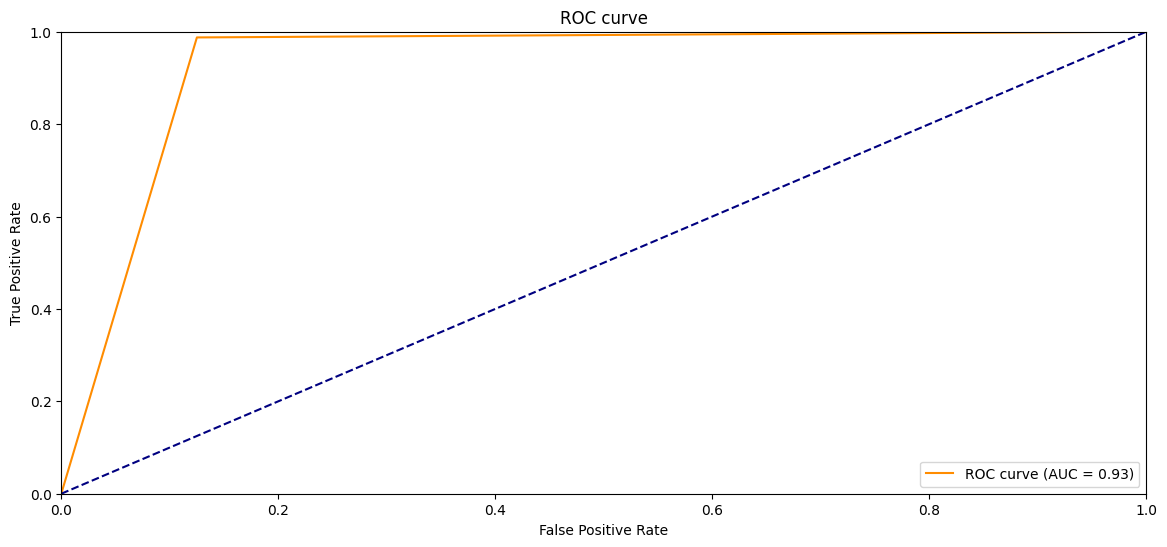

In [66]:
fpr, tpr, thresholds =roc_curve(y_test, y_test_pred, pos_label=1)
roc_auc=roc_auc_score(y_test, y_test_pred)
plt.figure( figsize=(14,6))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()